# **CONFIG**

In [29]:
class Configuration:
    def __init__(self):
        super(Configuration, self).__init__()
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.data_train_path = '../input/casiabpretreated/Here'
        self.data_test_path = '../input/kthextract-to-jpg/data/test'
        self.input_length = 10
        self.output_length = 10
        self.real_length = 20
        self.total_length = 20
        self.img_height = 64
        self.img_width = 64
        self.sr_size = 4
        self.img_channel = 1
        self.patch_size = 1
        self.alpha = 1
        self.model_name = 'mau'
        self.dataset = 'custom'
        self.cell_mode = 'normal'
        self.model_mode = 'recall'
        self.num_workers = 2
        self.num_hidden = 64
        self.num_layers = 2
        self.num_heads = 2
        self.filter_size = (5, 5)
        self.stride = 1
        self.time = 2
        self.time_stride = 1
        self.tau = 7
        self.is_training = True
        self.lr = 2e-4
        self.lr_decay = 0.90
        self.delay_interval = 2000
        self.batch_size = 16
        self.max_iterations = 150000
        self.max_epoches = 10
        self.display_interval = 75
        self.plot_interval = 75
        self.test_interval = 1010
        self.snapshot_interval = 1000
        self.num_save_samples = 3
        self.n_gpu = 1
        self.pretrained_model_g = '../input/afterganwts/model_g.ckpt-7500'
        self.pretrained_model_d = '../input/afterganwts/model_d.ckpt-7500'
        self.perforamnce_dir = 'results/custom'
        self.save_dir = 'saves/custom'
        self.gen_frm_dir = 'results/custom/'
        self.scheduled_sampling = True
        self.sampling_stop_iter = 50000
        self.sampling_start_value = 0.80
        self.sampling_changing_rate = 0.00007
        self.gan = True
        self.verbose = False
        
configs = Configuration()
args = configs

## TEST CASE

In [30]:
def test_model(configs):
    nl = 4
    nh = [64, 64, 64, 64]
    z = torch.randn(1, 20, 3, 200, 160).to(configs.device)
    m = torch.zeros(1, 9, 200, 160, 3).to(configs.device)
    model = RNN(nl, nh, configs).to(configs.device)
    g = model(z, m, True)
    print(g.shape)

# test_model(configs)

# **TRAIN**

Initializing models
Load predictive model: ../input/afterganwts/model_g.ckpt-7500
1240
1813
Evaluating...
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [on]


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Loading model from: /opt/conda/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth


  1%|          | 1/136 [00:05<13:23,  5.95s/it]

1.1460129022598267 1.375175952911377


 36%|███▌      | 49/136 [00:24<00:28,  3.01it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


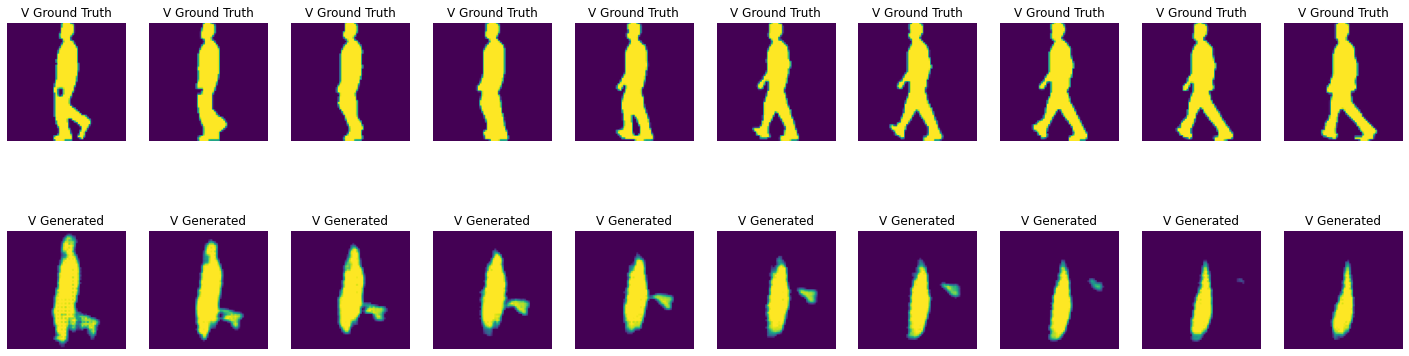

 73%|███████▎  | 99/136 [00:37<00:08,  4.34it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


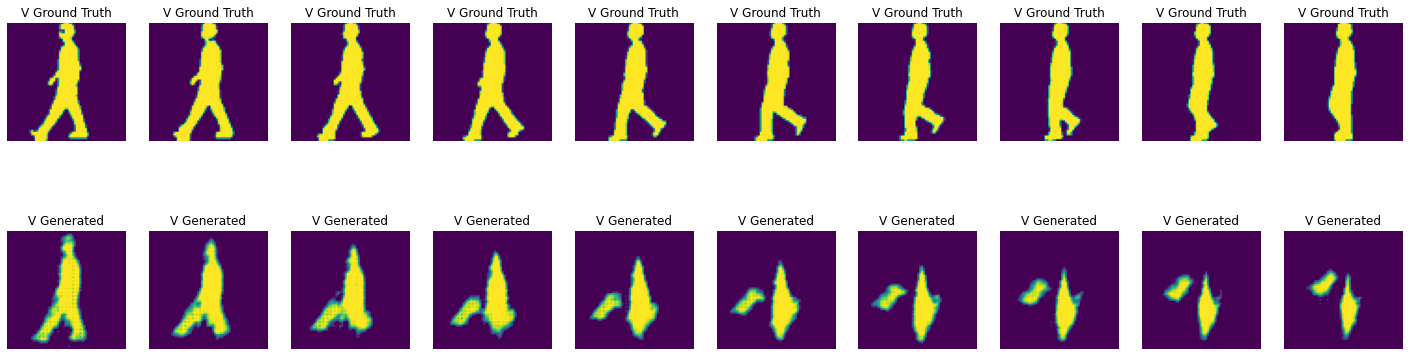

100%|██████████| 136/136 [00:47<00:00,  2.87it/s]


Eval MSE:  498.25986189000747
Eval MAE:  573.1346754186294
Avg-MSE: 4.478788232500745e+244
MSE/Frame: [4.75131576e-002 8.06877921e-002 7.32428757e+152 1.36608769e+172
 4.03387582e+239 4.47878420e+245 1.42924281e-001 1.47270576e-001
 7.47749596e+148 1.49244069e-001]
Avg-MAE: 0.13793587966629275
MAE/Frame: [0.06895781 0.09978464 0.12024816 0.13406288 0.14513954 0.1536665
 0.1605388  0.16458255 0.16650898 0.16586893]
Avg-SSIM: 1.3288130523781016e+174
SSIM/Frame: [1.32881305e+175 6.92674545e-001 6.39967021e-001 6.05112089e-001
 5.81965345e-001 5.65556189e-001 5.57084789e-001 5.57016260e-001
 5.64135199e-001 2.44968380e+159]
Avg-PSNR: 5.357221604263784e+196
PSNR/Frame: [1.29923371e+001 1.07291425e+001 9.72836460e+000 9.15899942e+000
 8.76920669e+000 5.35722160e+197 3.00430545e+085 8.14185497e+000
 8.07966952e+000 8.09329476e+000]
Avg-LPIPS: 5.121571990105459e+255
LPIPS/Frame: [ 2.27290252e+233  1.52285448e+001  5.12157199e+256 -3.69559526e+127
  1.54646271e+041  8.16497235e+048  1.71544174e

  0%|          | 0/80 [00:00<?, ?it/s]

ETA:  0.79993
Epoch: 0
Aplha:  1
Beta:  1
Step: 0 T L1 loss: 4.560802936553955 T L2 loss: 0.1854579597711563


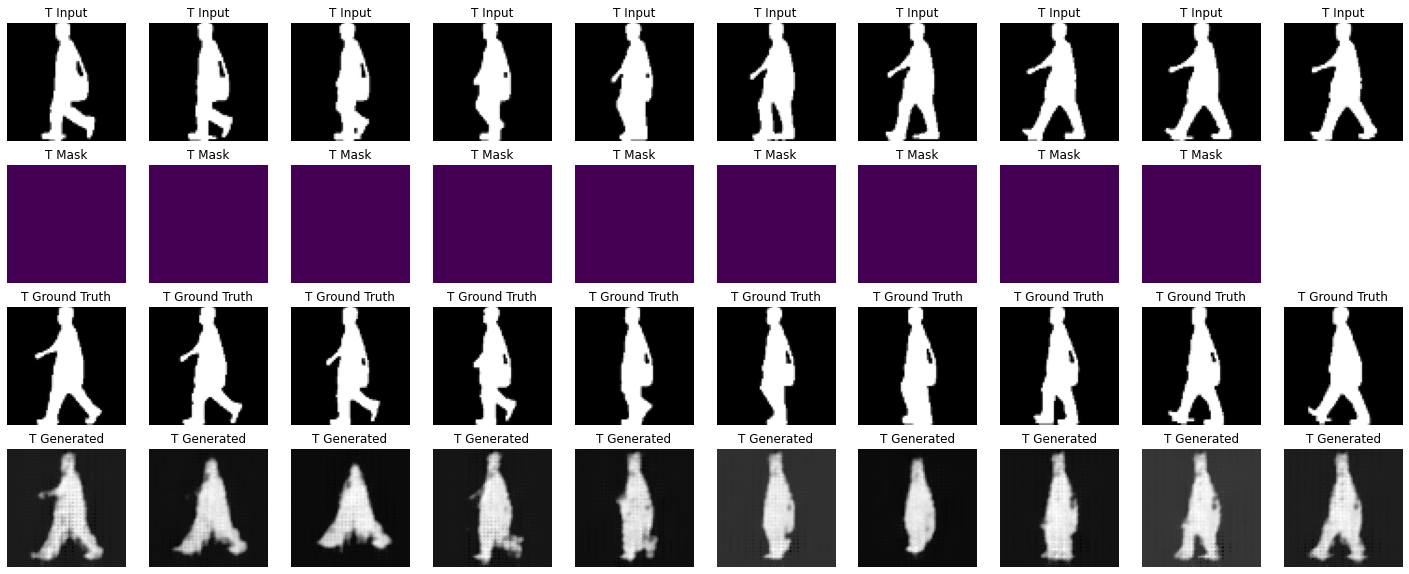

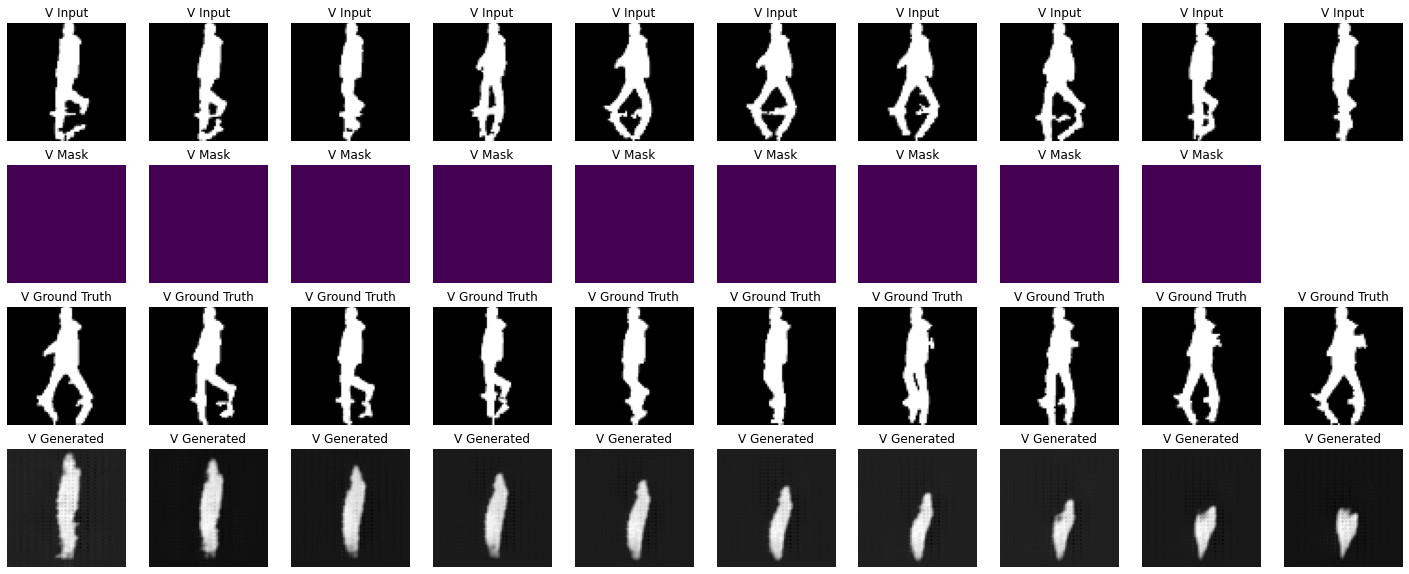

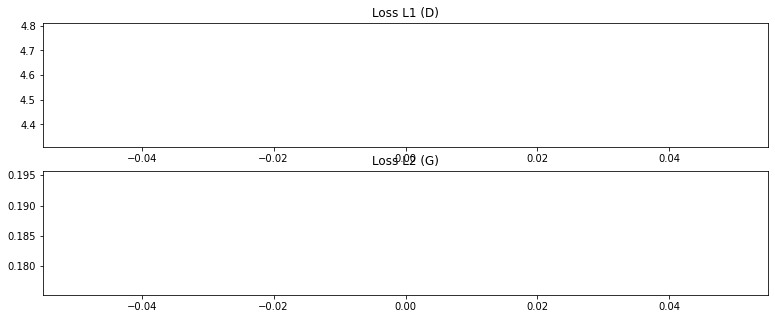

 30%|███       | 24/80 [00:46<01:36,  1.72s/it]

-0.2913156747817993 -0.9888290166854858


 94%|█████████▍| 75/80 [02:13<00:08,  1.70s/it]

Epoch: 0
Aplha:  1
Beta:  1
Step: 75 T L1 loss: 0.24323120713233948 T L2 loss: 0.018144598230719566


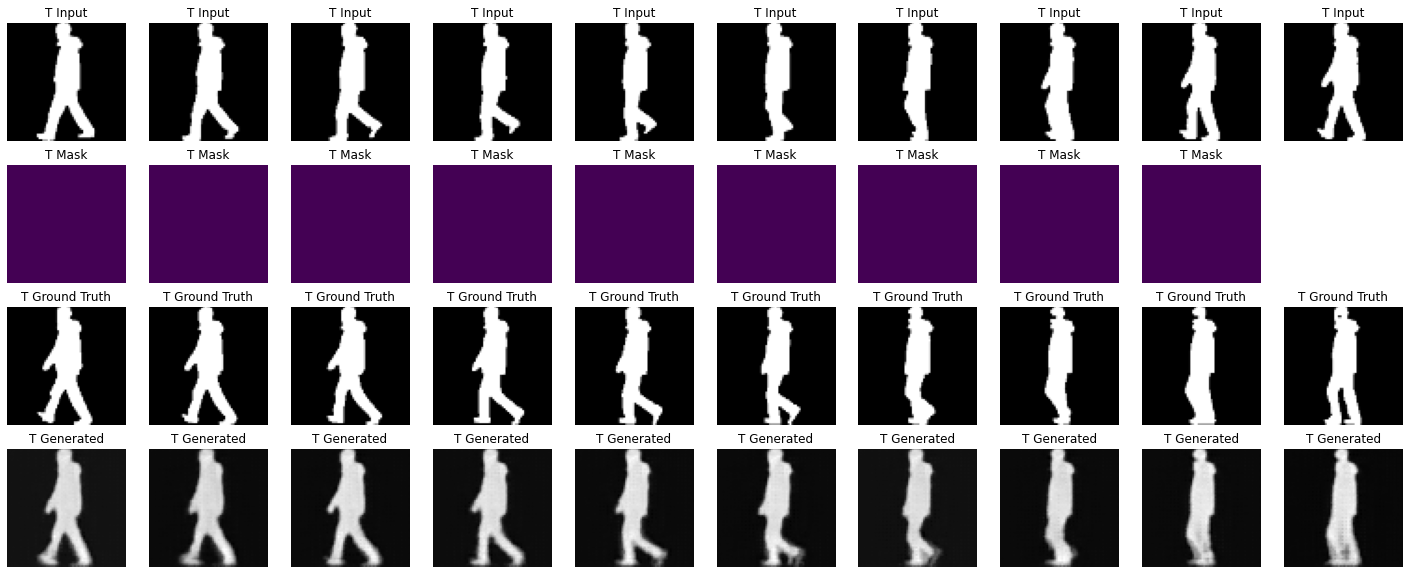

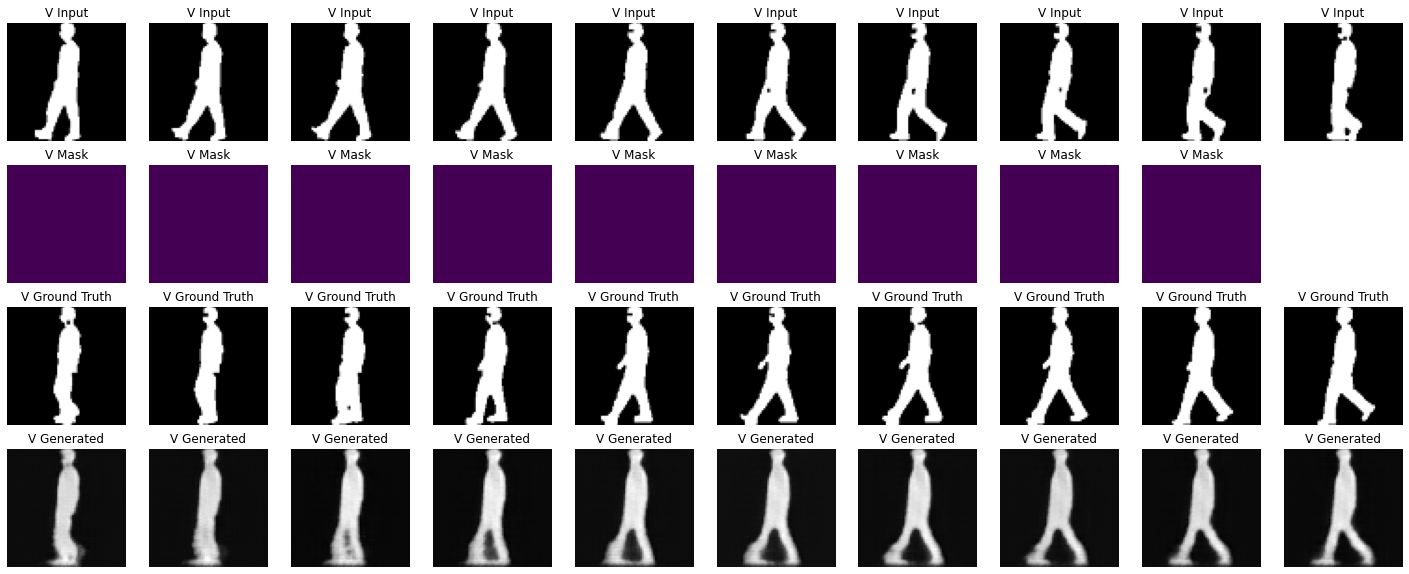

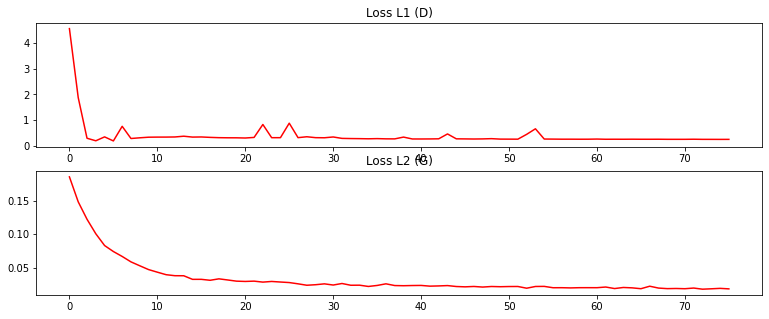

  4%|▍         | 3/80 [00:05<02:20,  1.82s/it]

-0.2910481095314026 -0.9883719682693481


 25%|██▌       | 20/80 [00:34<01:42,  1.71s/it]

ETA:  0.7929299999999986


 79%|███████▉  | 63/80 [01:49<00:29,  1.75s/it]

1.143330693244934 1.378581166267395


 88%|████████▊ | 70/80 [02:01<00:17,  1.75s/it]

Epoch: 1
Aplha:  1
Beta:  1
Step: 150 T L1 loss: 0.23476094007492065 T L2 loss: 0.014865829609334469


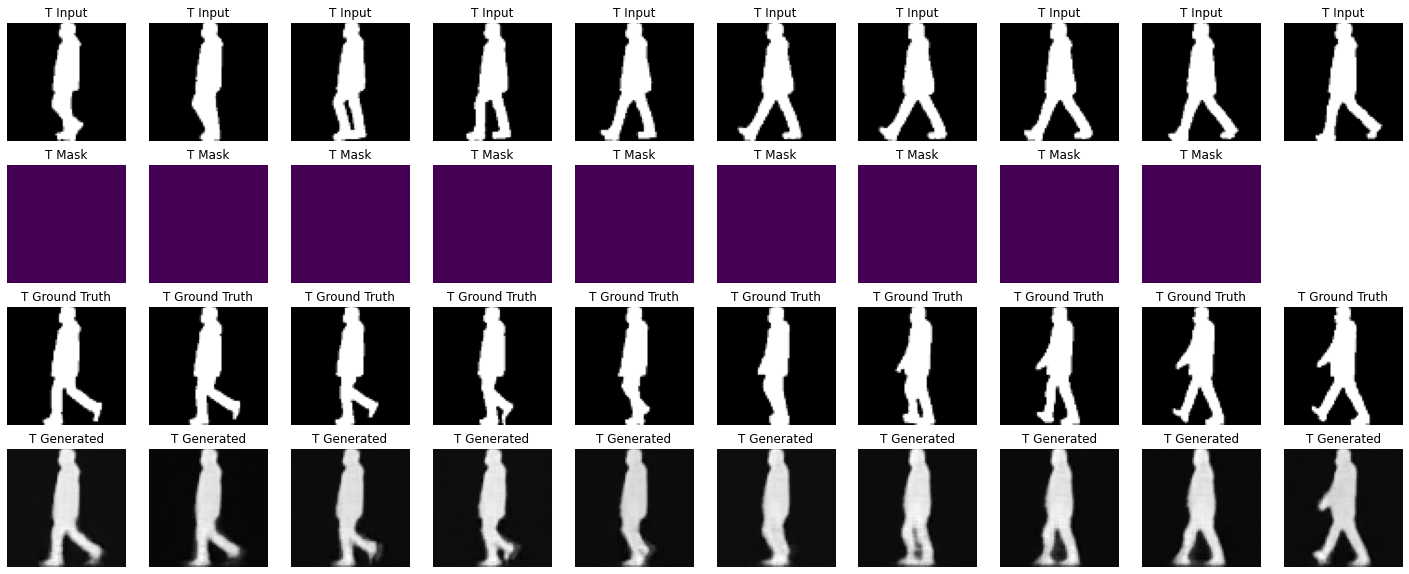

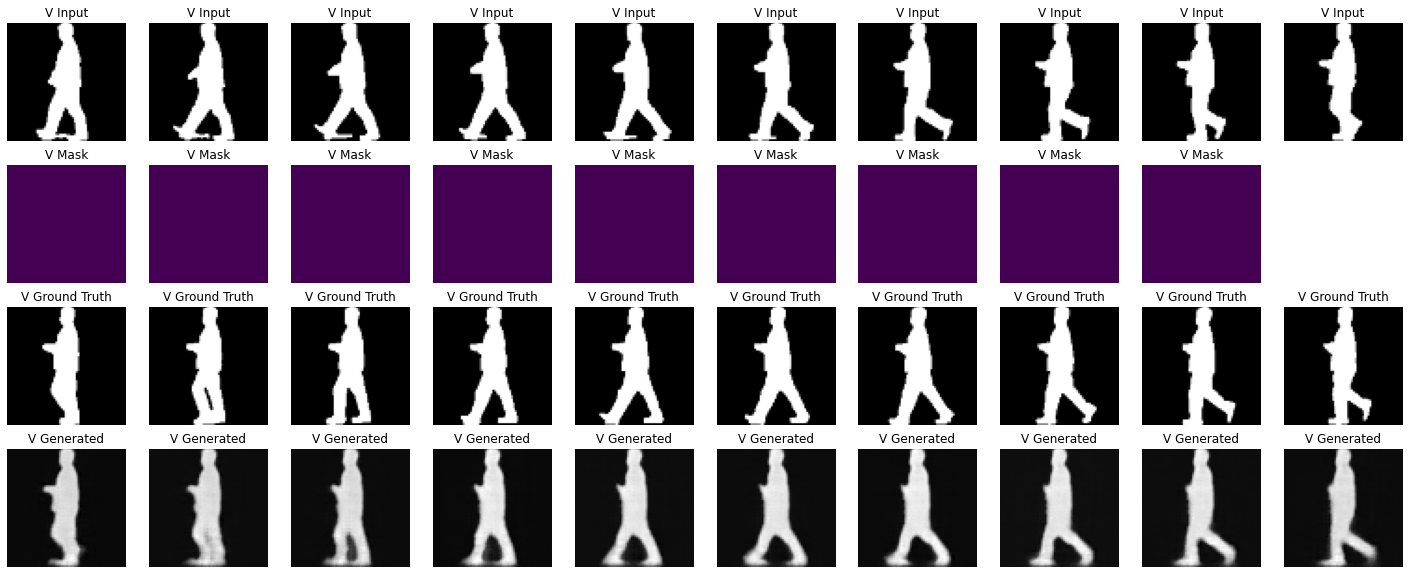

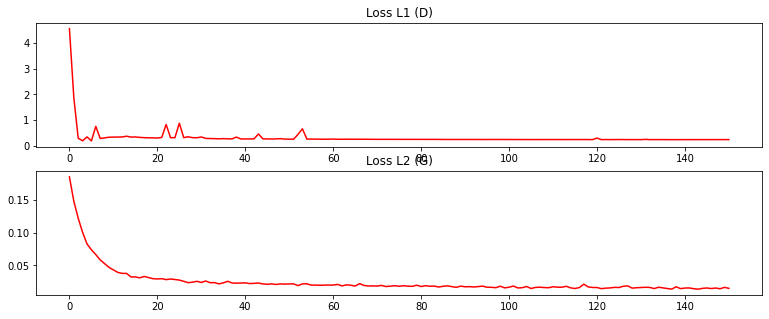

 50%|█████     | 40/80 [01:10<01:11,  1.80s/it]

ETA:  0.7859299999999971


 52%|█████▎    | 42/80 [01:13<01:06,  1.75s/it]

1.143198013305664 1.3785066604614258


 81%|████████▏ | 65/80 [01:53<00:25,  1.73s/it]

Epoch: 2
Aplha:  1
Beta:  1
Step: 225 T L1 loss: 0.28271159529685974 T L2 loss: 0.013159887865185738


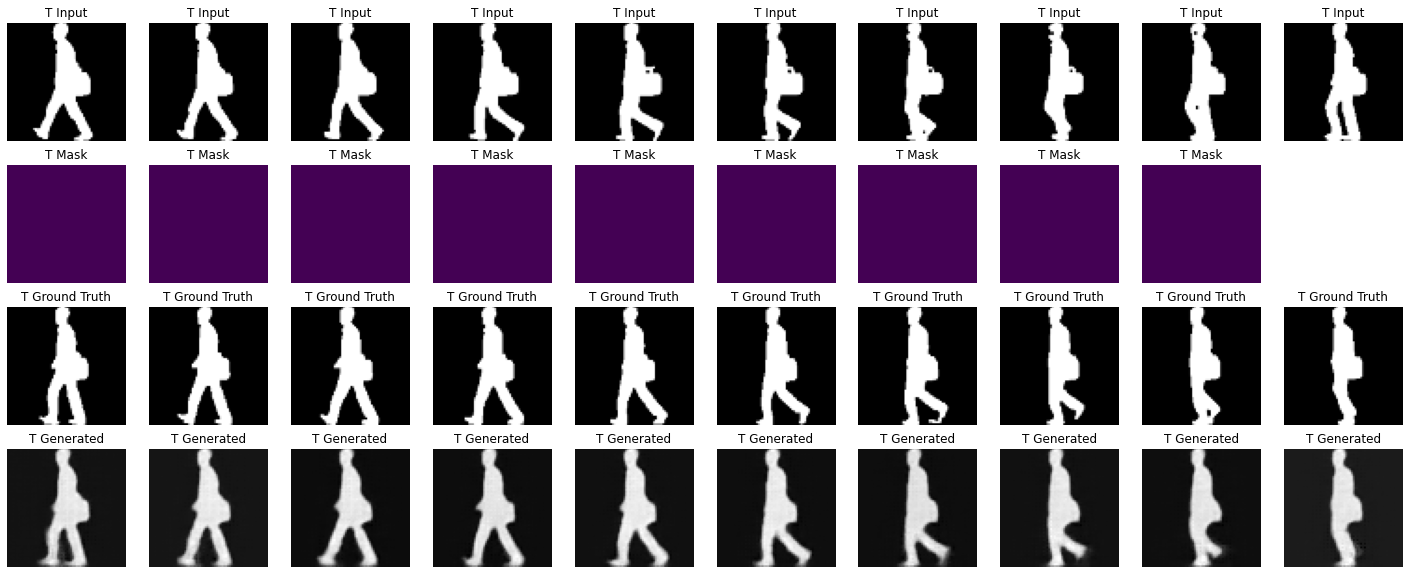

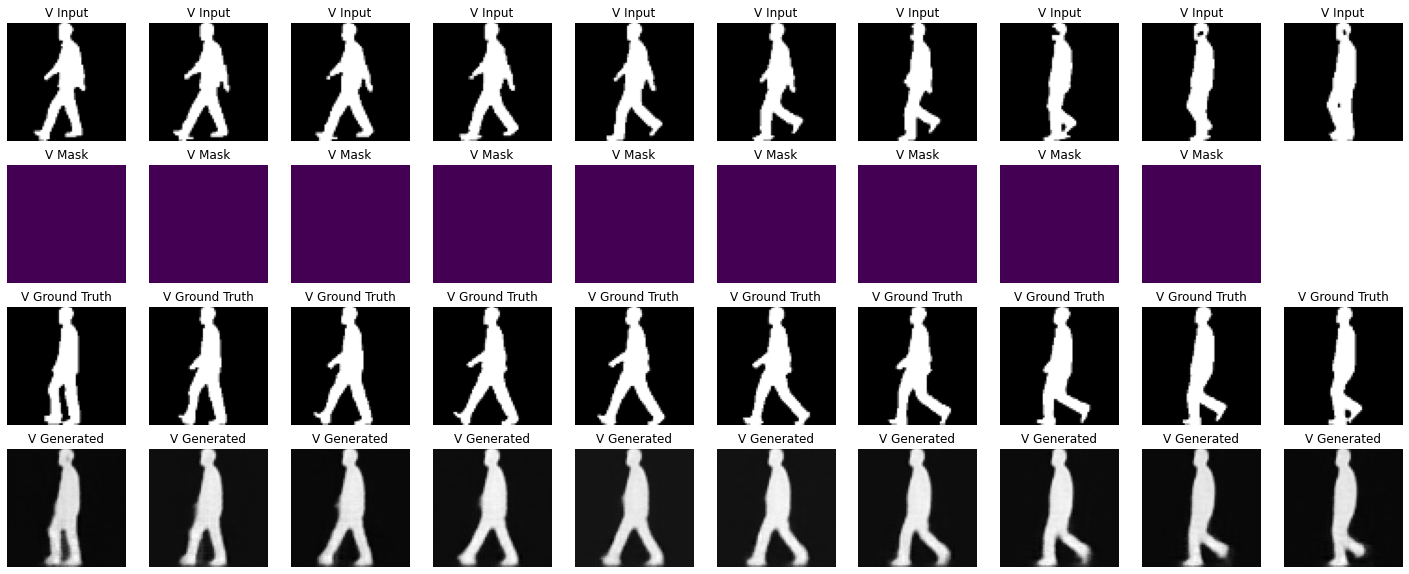

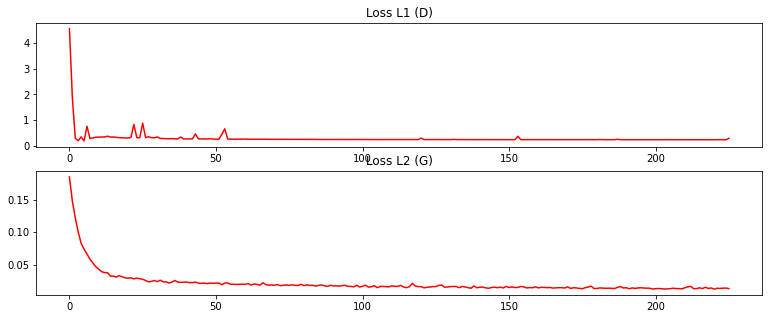

 26%|██▋       | 21/80 [00:37<01:43,  1.75s/it]

1.1432276964187622 1.3784292936325073


 75%|███████▌  | 60/80 [01:44<00:34,  1.73s/it]

ETA:  0.7789299999999957
Epoch: 3
Aplha:  10
Beta:  0.1
Step: 300 T L1 loss: 0.4911521077156067 T L2 loss: 0.01299879141151905


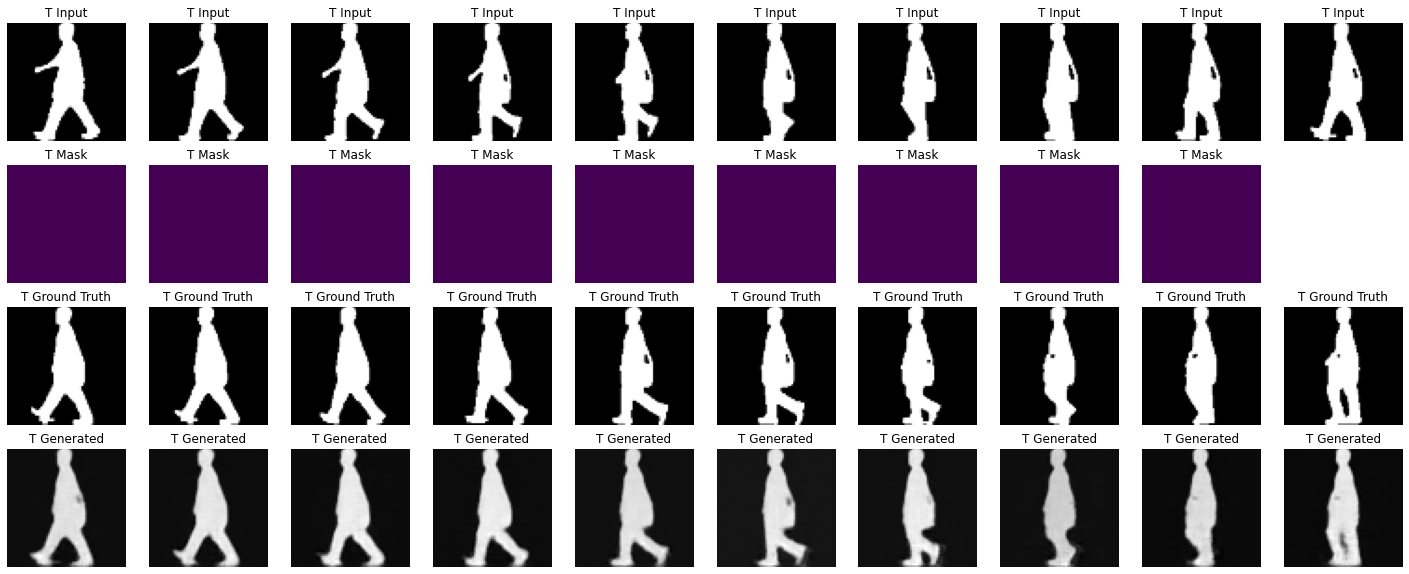

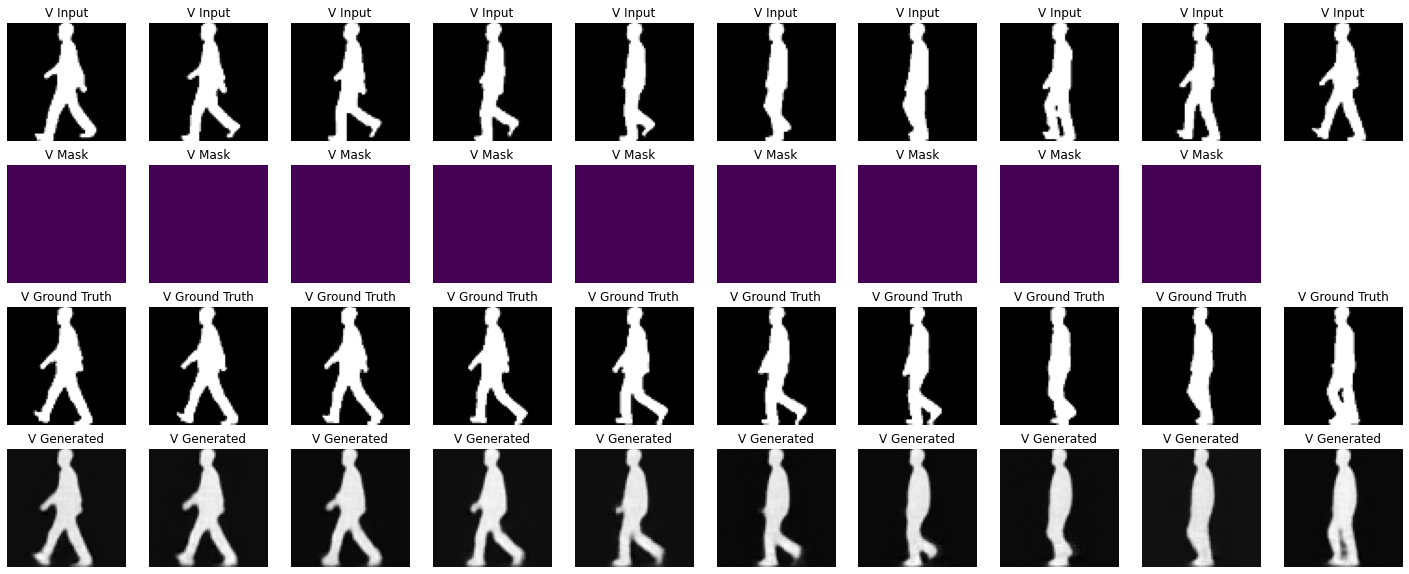

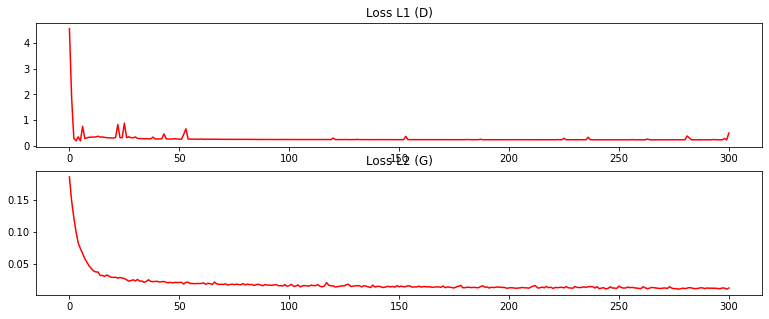

  0%|          | 0/80 [00:00<?, ?it/s]

1.1430484056472778 1.378275990486145


 69%|██████▉   | 55/80 [01:35<00:42,  1.71s/it]

Epoch: 4
Aplha:  100
Beta:  0.001
Step: 375 T L1 loss: 0.22589001059532166 T L2 loss: 0.01045238971710205


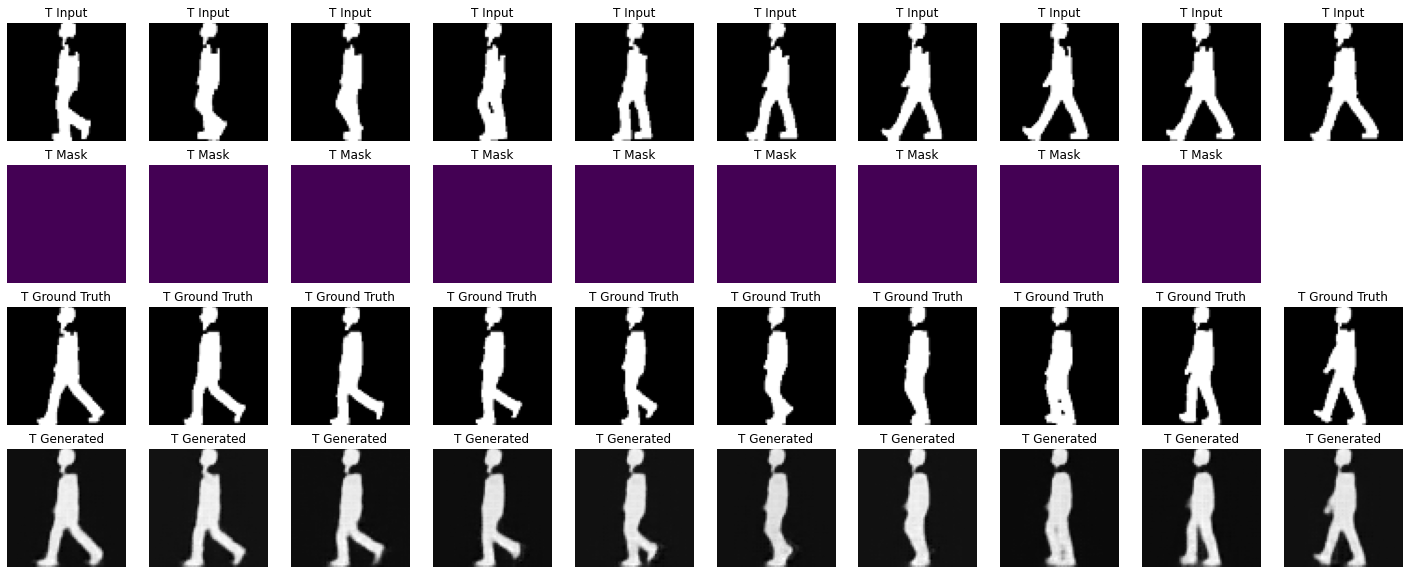

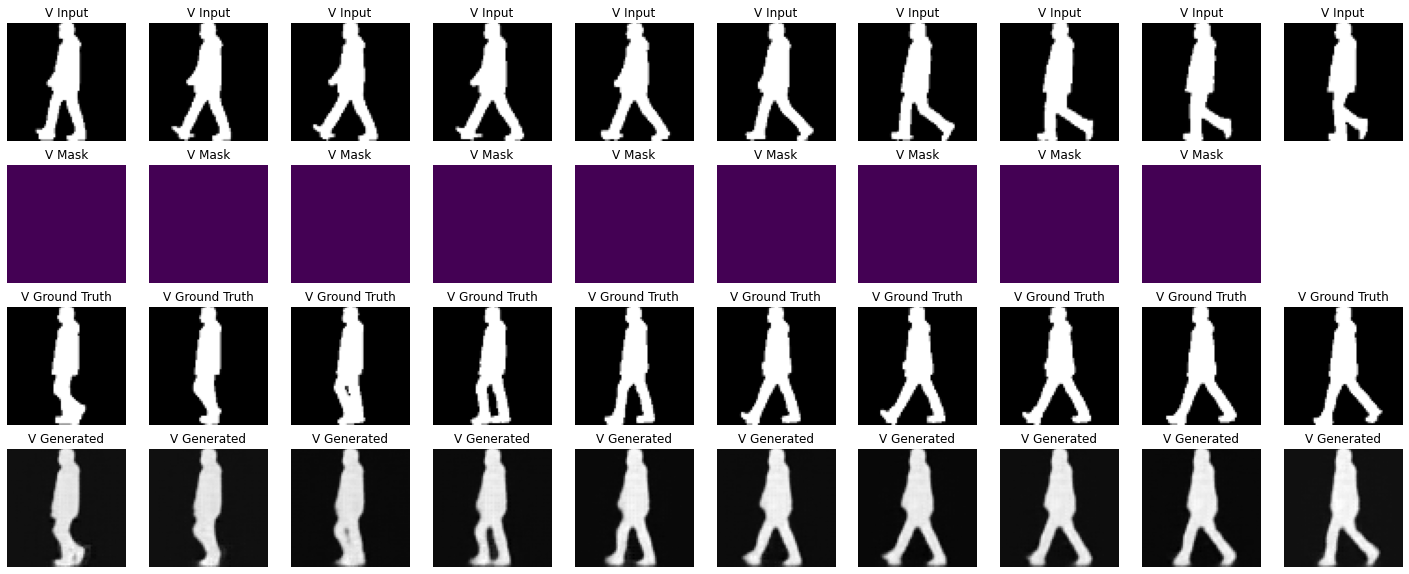

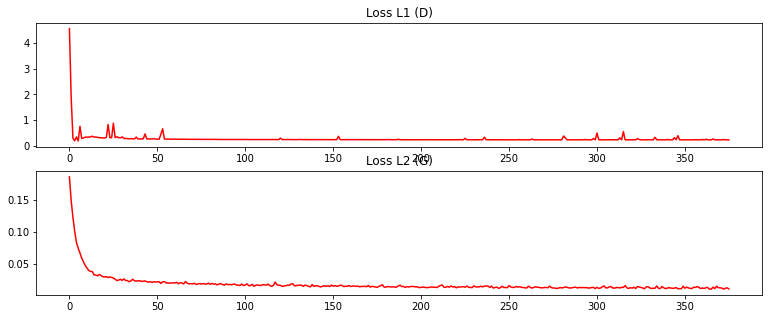

 72%|███████▎  | 58/80 [01:44<00:51,  2.32s/it]

-0.2903323471546173 -0.9889675378799438


  0%|          | 0/80 [00:00<?, ?it/s]

ETA:  0.7719299999999942


 48%|████▊     | 38/80 [01:06<01:11,  1.71s/it]

1.143125057220459 1.3780752420425415


 62%|██████▎   | 50/80 [01:27<00:51,  1.72s/it]

Epoch: 5
Aplha:  100
Beta:  0.001
Step: 450 T L1 loss: 0.5247179865837097 T L2 loss: 0.011482366360723972


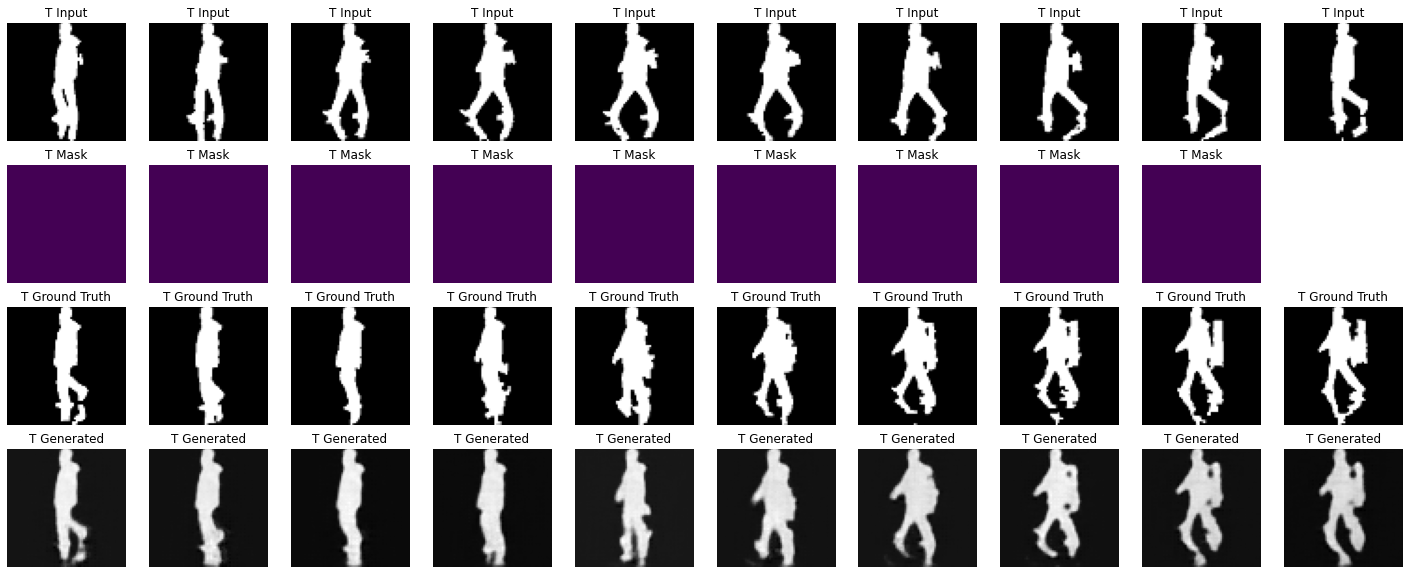

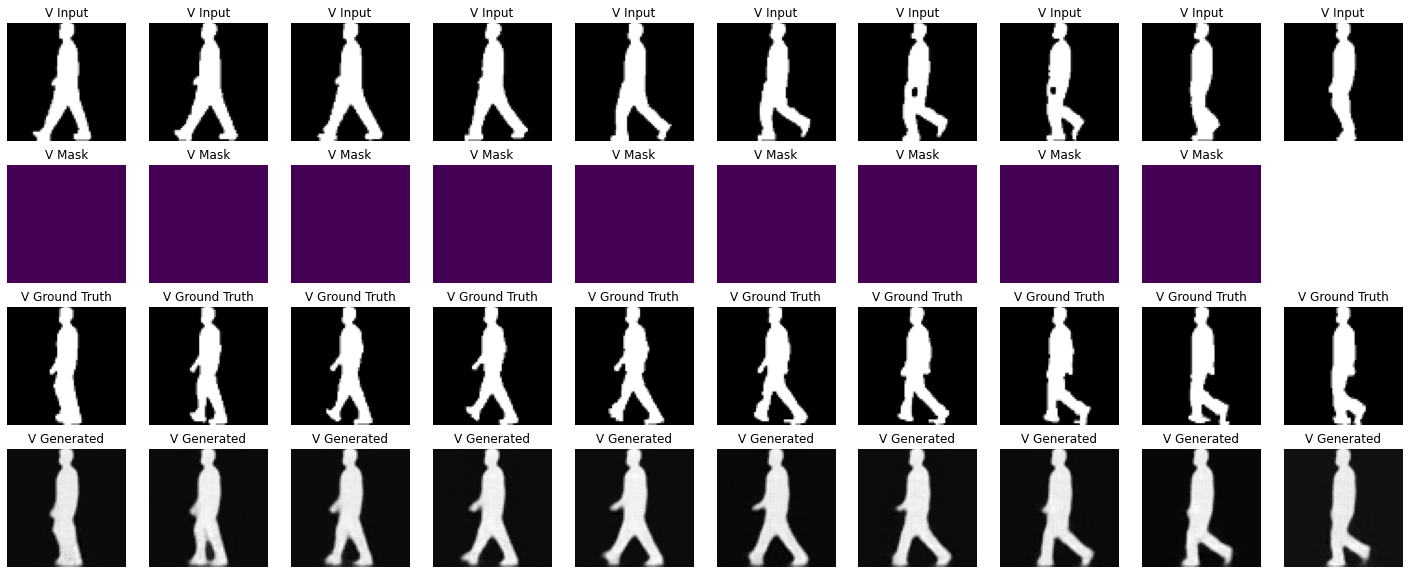

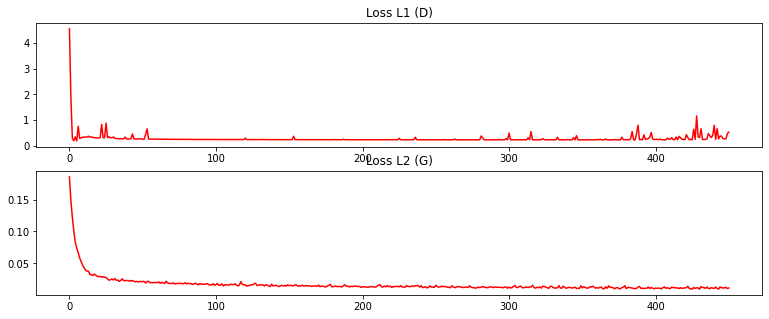

 21%|██▏       | 17/80 [00:30<01:47,  1.70s/it]

1.1433154344558716 1.377941608428955


 25%|██▌       | 20/80 [00:35<01:46,  1.77s/it]

ETA:  0.7649299999999928


 56%|█████▋    | 45/80 [01:18<01:00,  1.72s/it]

Epoch: 6
Aplha:  100
Beta:  0.001
Step: 525 T L1 loss: 0.3223586678504944 T L2 loss: 0.010954814963042736


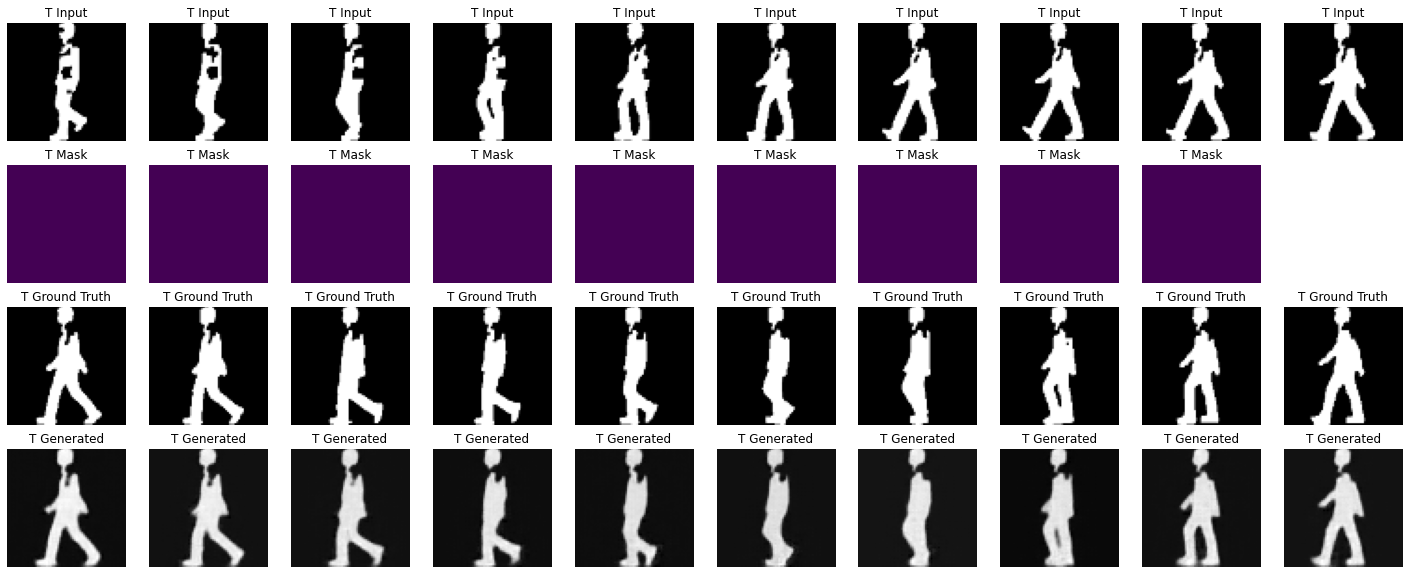

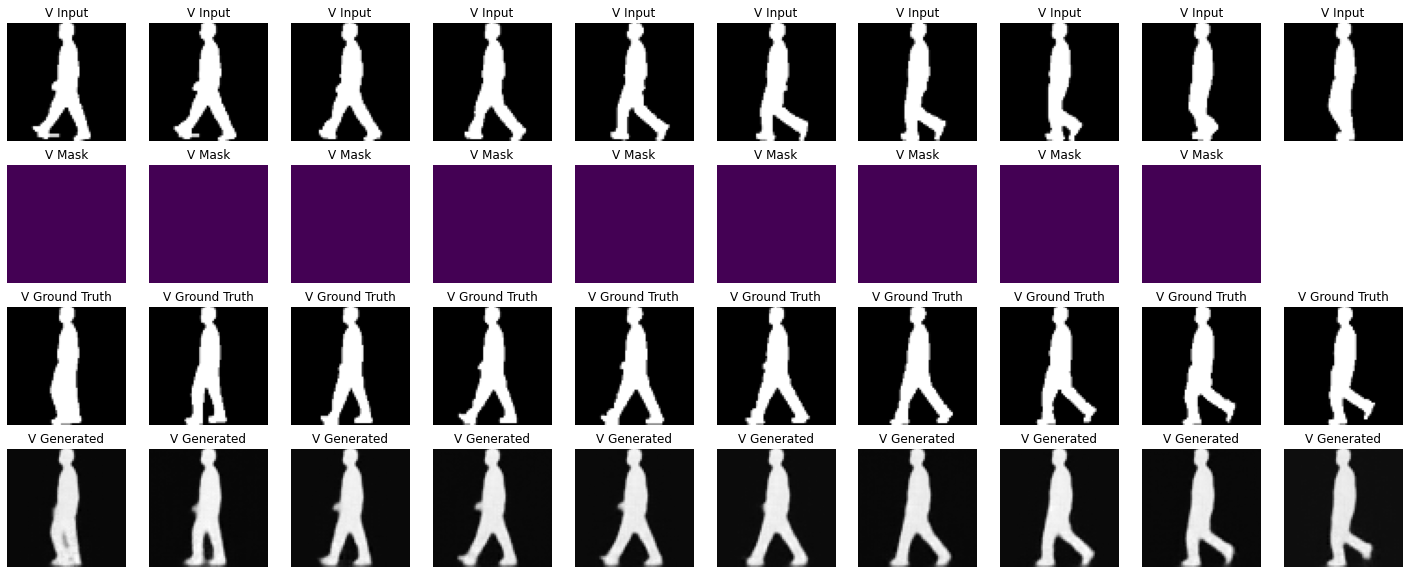

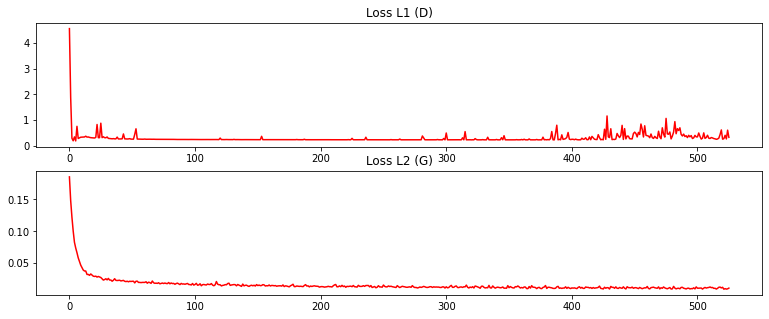

 95%|█████████▌| 76/80 [02:16<00:07,  1.79s/it]

1.1436002254486084 1.3778401613235474


 50%|█████     | 40/80 [01:10<01:08,  1.72s/it]

ETA:  0.7579299999999913
Epoch: 7
Aplha:  100
Beta:  0.001
Step: 600 T L1 loss: 0.23701170086860657 T L2 loss: 0.013027362525463104


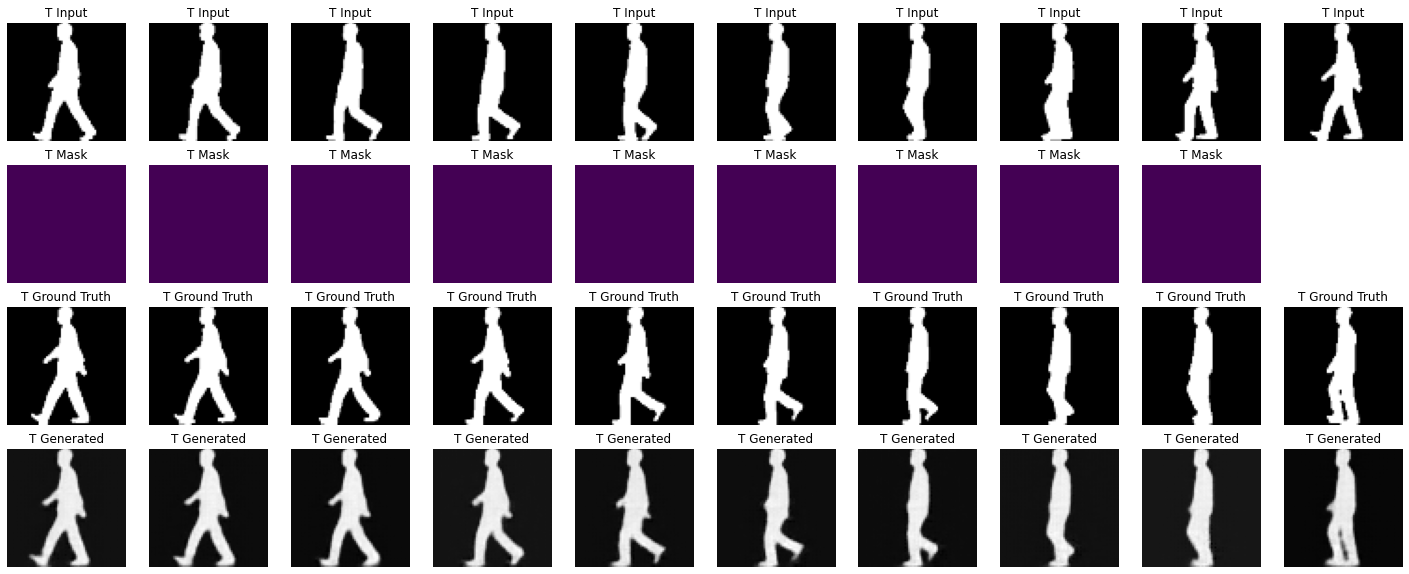

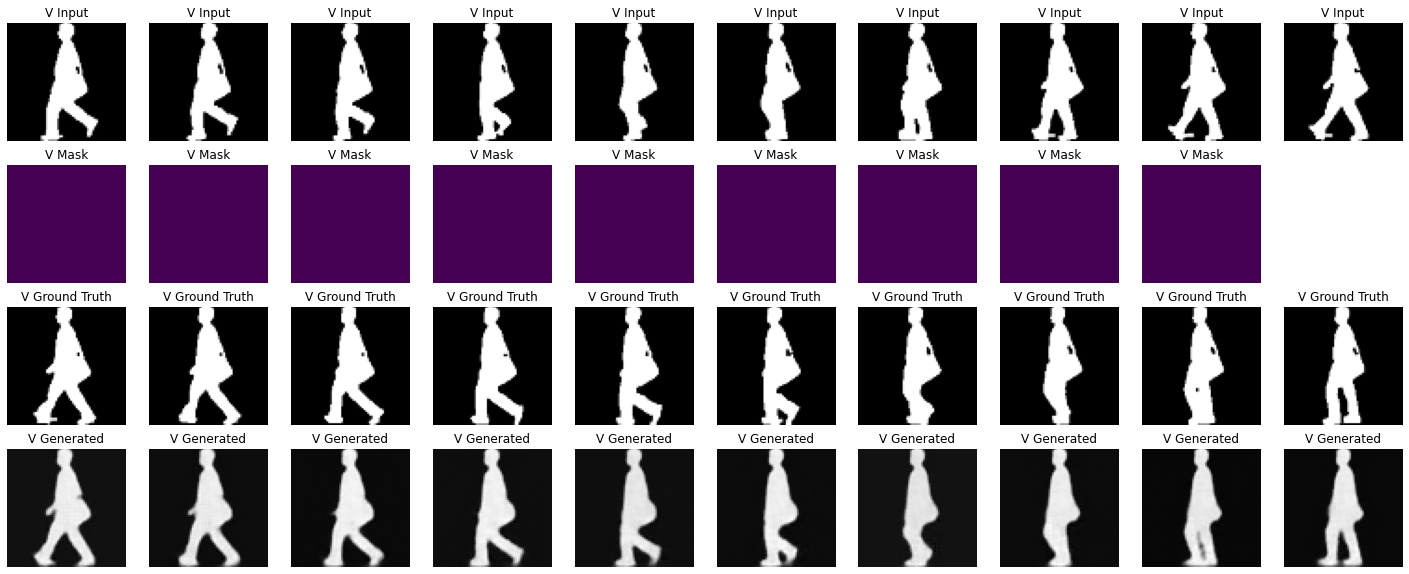

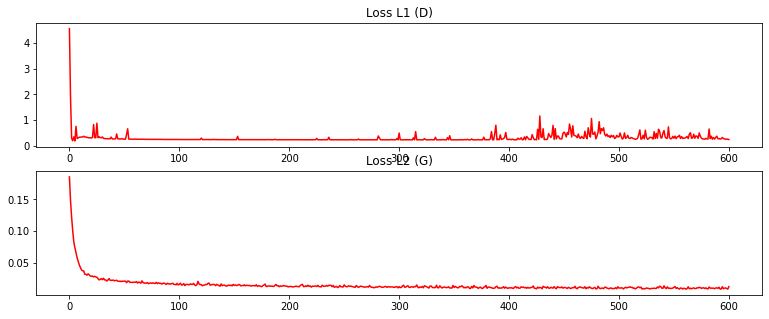

 69%|██████▉   | 55/80 [01:39<00:42,  1.72s/it]

1.1439175605773926 1.377600908279419


 42%|████▎     | 34/80 [00:59<01:19,  1.73s/it]

-0.290679395198822 -0.9891786575317383


 44%|████▍     | 35/80 [01:01<01:19,  1.77s/it]

Epoch: 8
Aplha:  100
Beta:  0.001
Step: 675 T L1 loss: 0.2711935043334961 T L2 loss: 0.011303097940981388


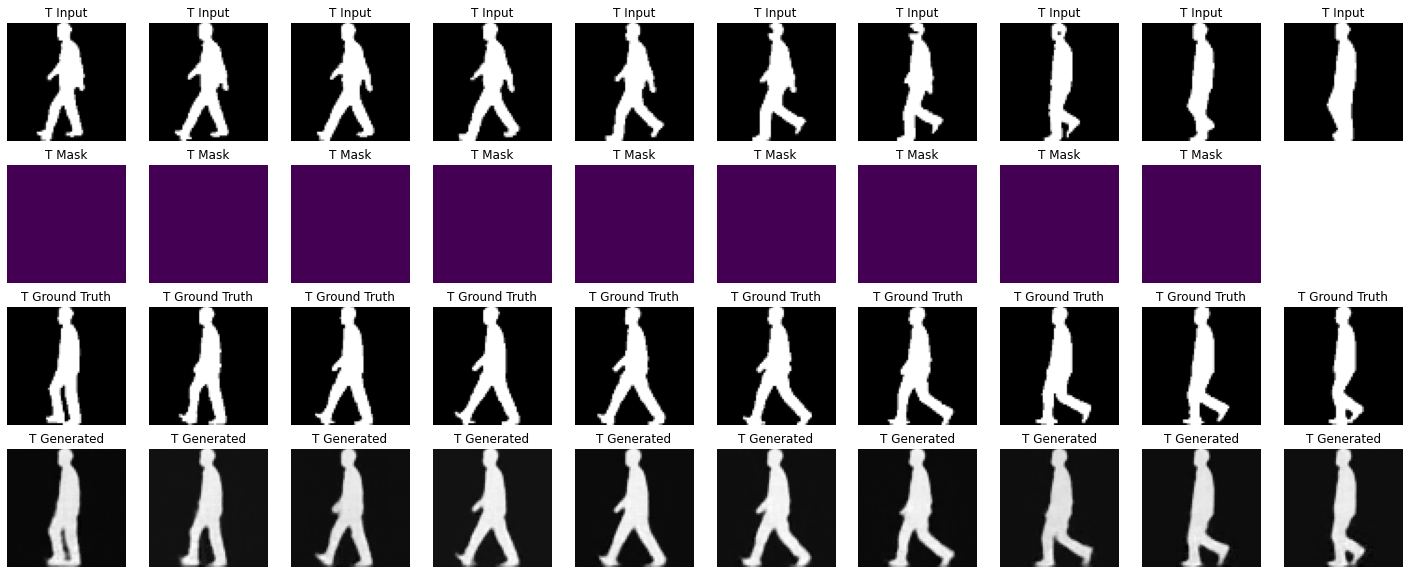

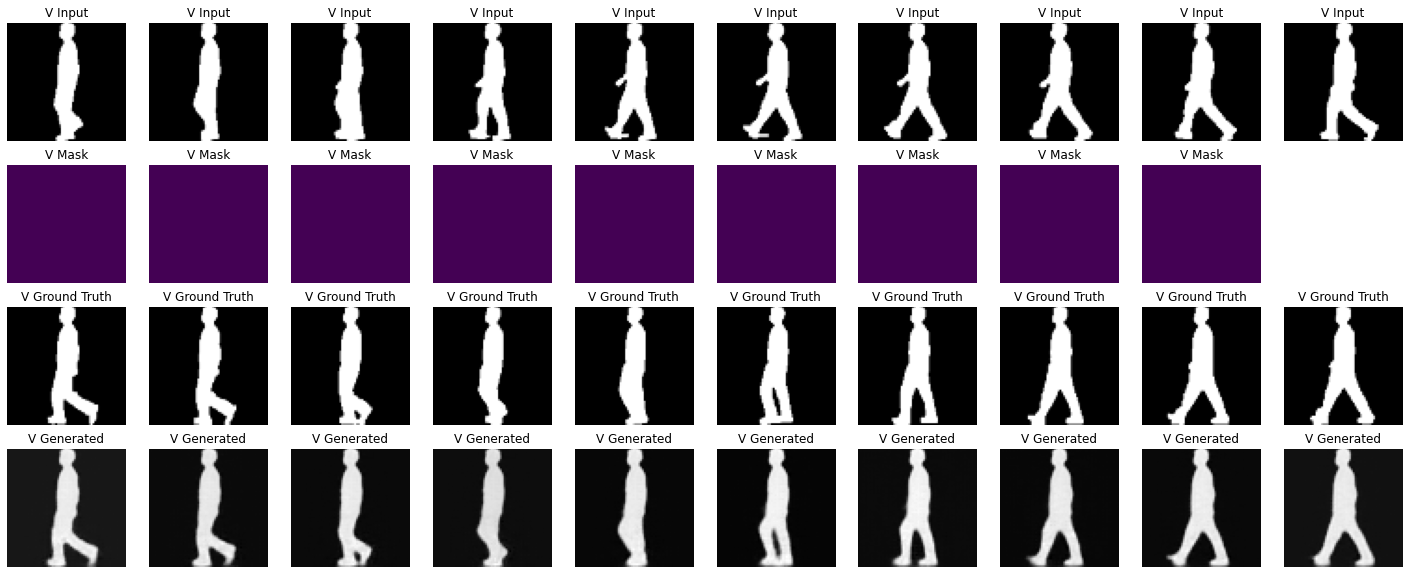

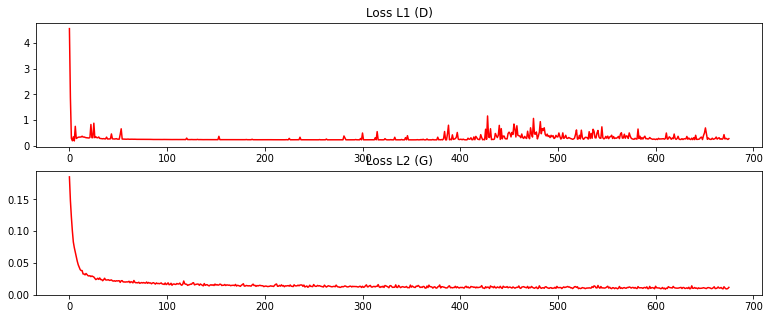

 75%|███████▌  | 60/80 [01:48<00:34,  1.72s/it]

ETA:  0.7509299999999899


100%|██████████| 80/80 [02:22<00:00,  1.78s/it]


Validate:
Evaluating...
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [on]
Loading model from: /opt/conda/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 49/136 [00:10<00:19,  4.35it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


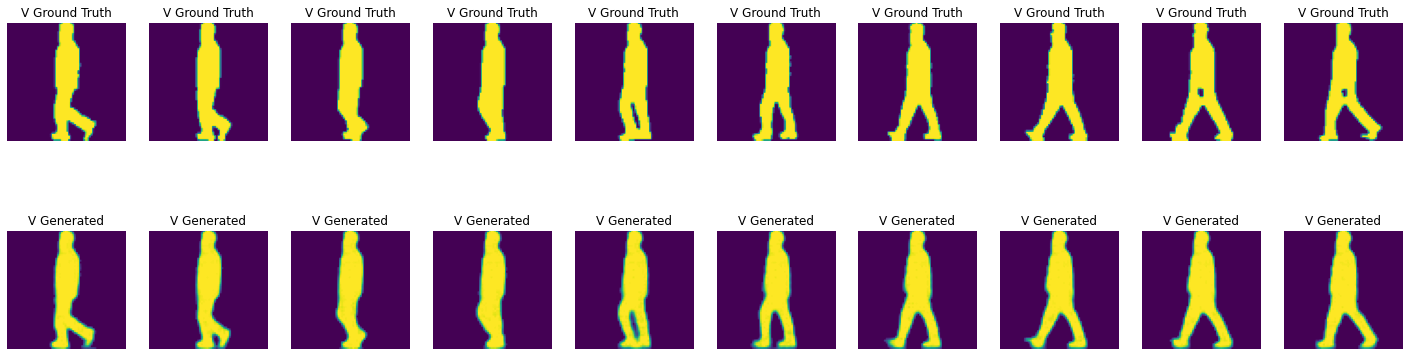

 39%|███▉      | 53/136 [00:12<00:26,  3.14it/s]

1.144387125968933 1.3773105144500732


 73%|███████▎  | 99/136 [00:22<00:07,  4.86it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


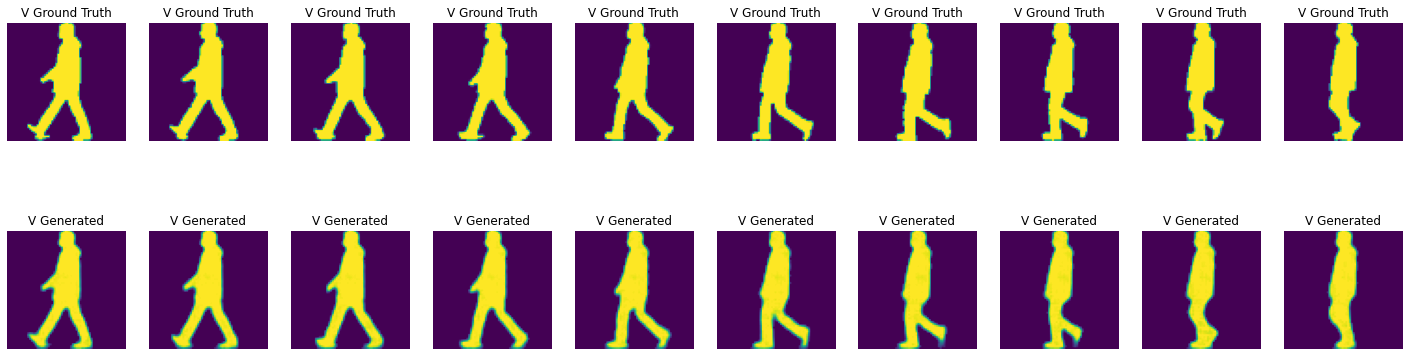

100%|██████████| 136/136 [00:30<00:00,  4.39it/s]


Eval MSE:  53.60775336097269
Eval MAE:  105.08404193204991
Avg-MSE: 0.01294497035594438
MSE/Frame: [0.00633691 0.00895706 0.01060883 0.01204434 0.01308828 0.01413456
 0.01500299 0.01552978 0.01641636 0.01733059]
Avg-MAE: 0.025344072557602296
MAE/Frame: [0.01718561 0.02084574 0.02288239 0.02453865 0.02566729 0.026914
 0.02777604 0.02826099 0.02919468 0.03017535]
Avg-SSIM: 0.9035774389837844
SSIM/Frame: [0.9414132  0.92735449 0.91583996 0.90882276 0.90059207 0.89562436
 0.89183011 0.88814583 0.88459183 0.8815598 ]
Avg-PSNR: 18.953778367533722
PSNR/Frame: [21.9031285  20.36465263 19.60931588 19.05557916 18.70409068 18.39503406
 18.14808532 18.01005549 17.78512061 17.56272134]
Avg-LPIPS: 1.7032405704463626e+74
LPIPS/Frame: [4.55971395e+00 5.70542240e+00 6.30875493e+00 6.89156728e+00
 7.22837164e+00 1.70324057e+75 7.62682140e+00 7.66514386e+00
 7.79081086e+00 7.91085053e+00]


 38%|███▊      | 30/80 [00:52<01:27,  1.74s/it]

Epoch: 9
Aplha:  100
Beta:  0.001
Step: 750 T L1 loss: 0.3838443458080292 T L2 loss: 0.010524257086217403


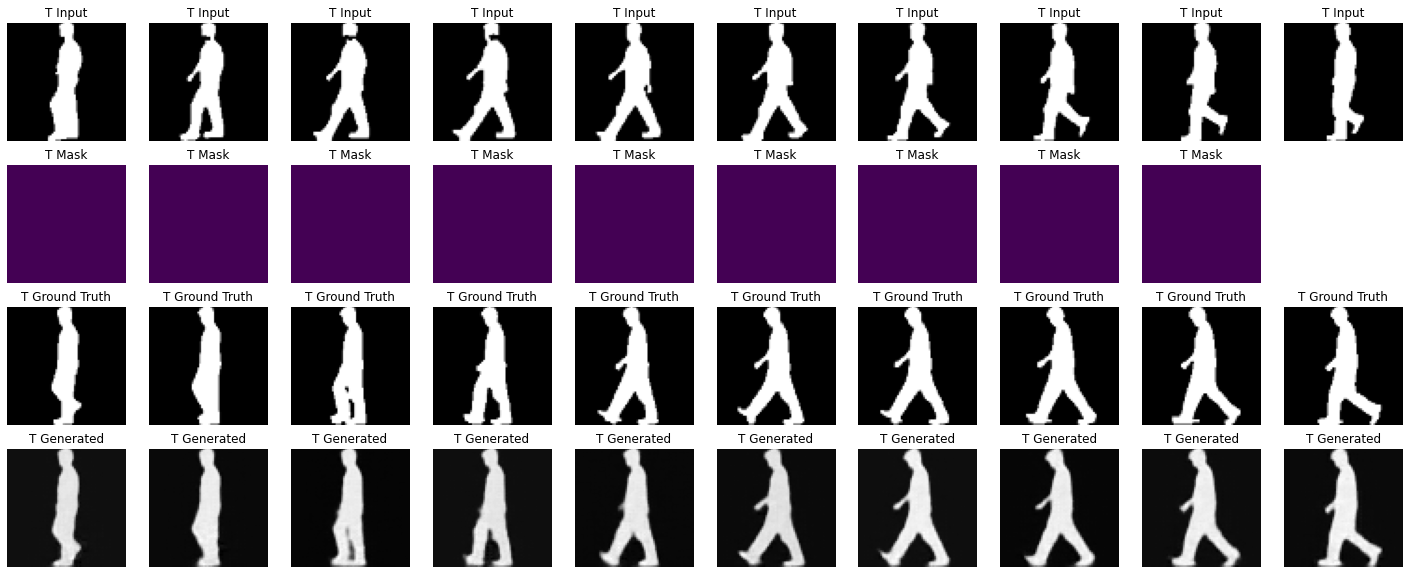

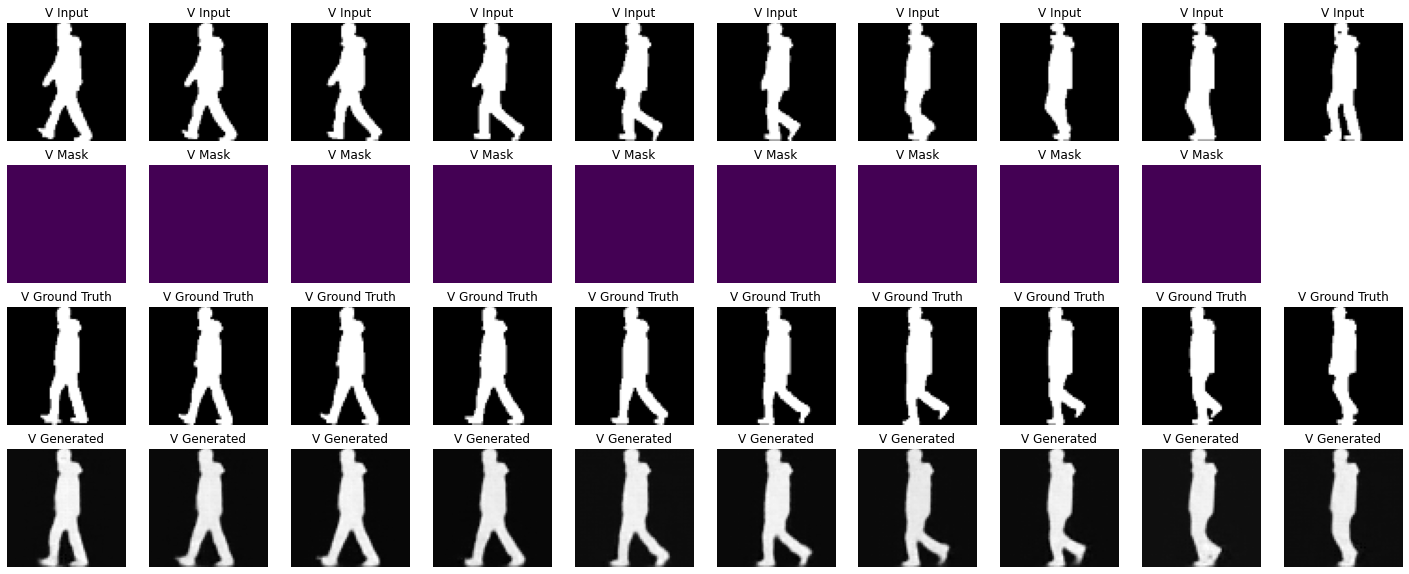

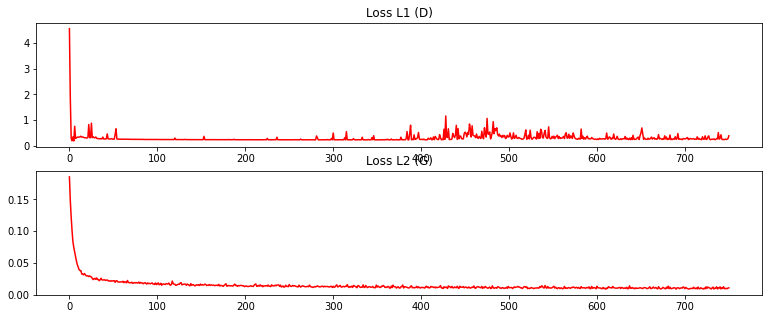

 48%|████▊     | 38/80 [01:10<01:16,  1.83s/it]

1.144522786140442 1.3772261142730713


100%|██████████| 80/80 [02:22<00:00,  1.78s/it]


Validate:
Evaluating...
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [on]
Loading model from: /opt/conda/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 49/136 [00:10<00:18,  4.59it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


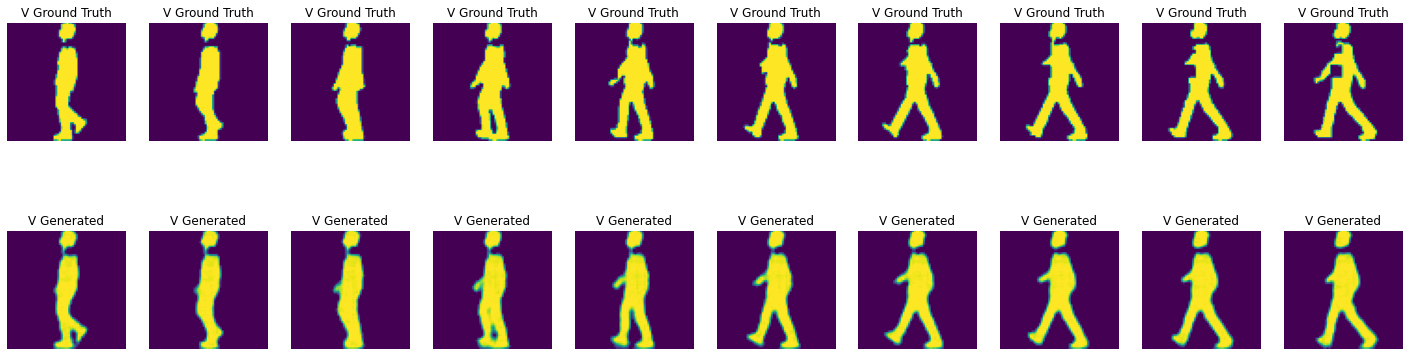

 51%|█████▏    | 70/136 [00:15<00:14,  4.64it/s]

1.1448085308074951 1.3771065473556519


 73%|███████▎  | 99/136 [00:21<00:07,  4.91it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


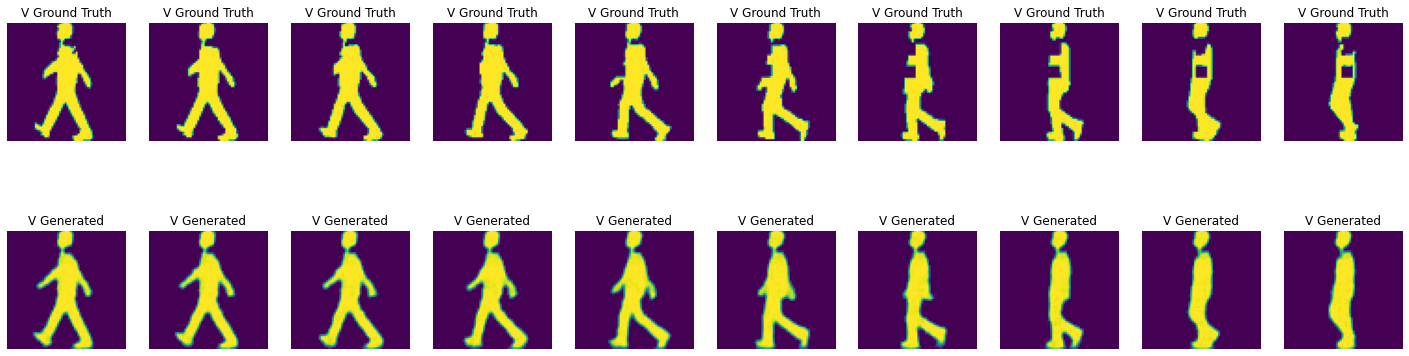

100%|██████████| 136/136 [00:31<00:00,  4.32it/s]

Eval MSE:  51.691507549846875
Eval MAE:  102.25916279063506
Avg-MSE: 1.736498874504607e+74
MSE/Frame: [6.14209530e-03 8.69526028e-03 1.02581718e-02 1.16712994e-02
 1.26593621e-02 1.35865310e-02 1.42780782e-02 1.73649887e+75
 1.55172858e-02 1.63668161e-02]
Avg-MAE: 2.2842274664726902e+228
MAE/Frame: [1.68798407e-002 2.04827209e-002 2.23772616e-002 2.39368315e-002
 2.50087560e-002 2.60536578e-002 2.67270858e-002 2.71358075e-002
 2.79409364e-002 2.28422747e+229]
Avg-SSIM: 0.9046767663114315
SSIM/Frame: [0.93878602 0.92356189 0.91397356 0.90547262 0.90137878 0.89723944
 0.89364322 0.89288826 0.89078451 0.88903936]
Avg-PSNR: 19.12433372523069
PSNR/Frame: [22.0359058  20.49686735 19.75485312 19.18031356 18.82978777 18.53552017
 18.34789737 18.23341903 18.01342799 17.81534509]
Avg-LPIPS: 1.703240576814661e+74
LPIPS/Frame: [4.44611720e+00 1.70324058e+75 6.10469035e+00 6.60119990e+00
 6.97332449e+00 7.19391347e+00 7.38780557e+00 7.41957701e+00
 7.55628073e+00 7.67763168e+00]


In [31]:
print('Initializing models')

model = Model(args)

if args.is_training:
    if not os.path.exists(args.save_dir):
        os.makedirs(args.save_dir)
    if not os.path.exists(args.gen_frm_dir):
        os.makedirs(args.gen_frm_dir)
    train_wrapper(model)
else:
    if not os.path.exists(args.gen_frm_dir):
        os.makedirs(args.gen_frm_dir)
    test_wrapper(model)